In [1]:
import csv
import sys
import os
import re
import numpy as np
import datetime

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import cm 

import pandas as pd
from scipy.interpolate import griddata

% matplotlib inline

In [2]:
save_file='analysis_out/'
converged_data=save_file+'new_converged_details.txt'

---
### Dictionary input

In [3]:
# Nifty trick
class Customdictionary(dict):
    def __setitem__(self,key,value):
        try:
            self[key]
        except KeyError:
            super(Customdictionary,self).__setitem__(key,[])
        self[key].append(value)

In [4]:
def remove_chars(string):
    chars="[^0123456789\.]"
    return re.sub(chars,"",string)

In [5]:
def make_xmap(l):
    from numpy import array
    ll = len(l)
    dy = 1.0 / (ll-1)
    def f(l, i):
        if i == 0 : return "0.0"
        y0 = i*dy-dy
        x0, x1 = l[i-1:i+1]
        return '%r+%r*(x-%r)/%r'%(y0,dy,x0,x1-x0)
    fmt = 'np.where(x<%f,%s%s'
    body = ' '.join(fmt%(j,f(l,i),"," if i<(ll-1) else ", 1.0") for i, j in enumerate(l))
    tail = ')'*ll
    def xm(x):
        x = array(x)
        return eval(body+tail)
    return xm

---
## Converged cluster

In [6]:
# Identifiers
temp_dict_00=Customdictionary()
temp_dict_05=Customdictionary()
temp_dict_10=Customdictionary()
temp_dict_20=Customdictionary()
temp_dict_25=Customdictionary()
temp_dict_30=Customdictionary()
temp_dict_40=Customdictionary()

# Separating data based on sensor noise
converged_data_dict_00=Customdictionary()
converged_data_dict_05=Customdictionary()
converged_data_dict_10=Customdictionary()
converged_data_dict_20=Customdictionary()
converged_data_dict_25=Customdictionary()
converged_data_dict_30=Customdictionary()
converged_data_dict_40=Customdictionary()


with open(converged_data,'r') as f:
    for line in f:
        temp=line.split(',')
        
        data_val=int(temp[2].lstrip())
        key_raw=(temp[0]+temp[1]).split('_')
        arena_length=int(key_raw[1])
        arena_size=arena_length*arena_length
        n_robots=int(arena_size*float(key_raw[3]))
        n_defecting=int(n_robots*float(key_raw[5]))
        comm_range=int(key_raw[7])
        sensor_fault=float(key_raw[11])
        
       
        
        if sensor_fault==0.0:
            temp_dict_00[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_00[key]=int(data_val)
        elif sensor_fault==0.05:
            temp_dict_05[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_05[key]=int(data_val)
        elif sensor_fault==0.10:
            temp_dict_10[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_10[key]=int(data_val)
        elif sensor_fault==0.20:
            temp_dict_20[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_20[key]=int(data_val)
        elif sensor_fault==0.25:
            temp_dict_25[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_25[key]=int(data_val)
        elif sensor_fault==0.30:
            temp_dict_30[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_30[key]=int(data_val)
        elif sensor_fault==0.40:
            temp_dict_40[n_robots]=n_defecting
            key='C'+str(arena_length)+'_R'+str(n_robots)+'_D'+str(n_defecting)+'_S'+str(sensor_fault)
            converged_data_dict_40[key]=int(data_val)

In [7]:
setup_dict_00={}
setup_dict_05={}
setup_dict_10={}
setup_dict_20={}
setup_dict_25={}
setup_dict_30={}
setup_dict_40={}
for k,v in temp_dict_00.items():
    setup_dict_00[k]=set(v)
for k,v in temp_dict_05.items():
    setup_dict_05[k]=set(v)
for k,v in temp_dict_10.items():
    setup_dict_10[k]=set(v)
for k,v in temp_dict_20.items():
    setup_dict_20[k]=set(v)
for k,v in temp_dict_25.items():
    setup_dict_25[k]=set(v)
for k,v in temp_dict_30.items():
    setup_dict_30[k]=set(v)
for k,v in temp_dict_40.items():
    setup_dict_40[k]=set(v)

---
### Converged cluster-00

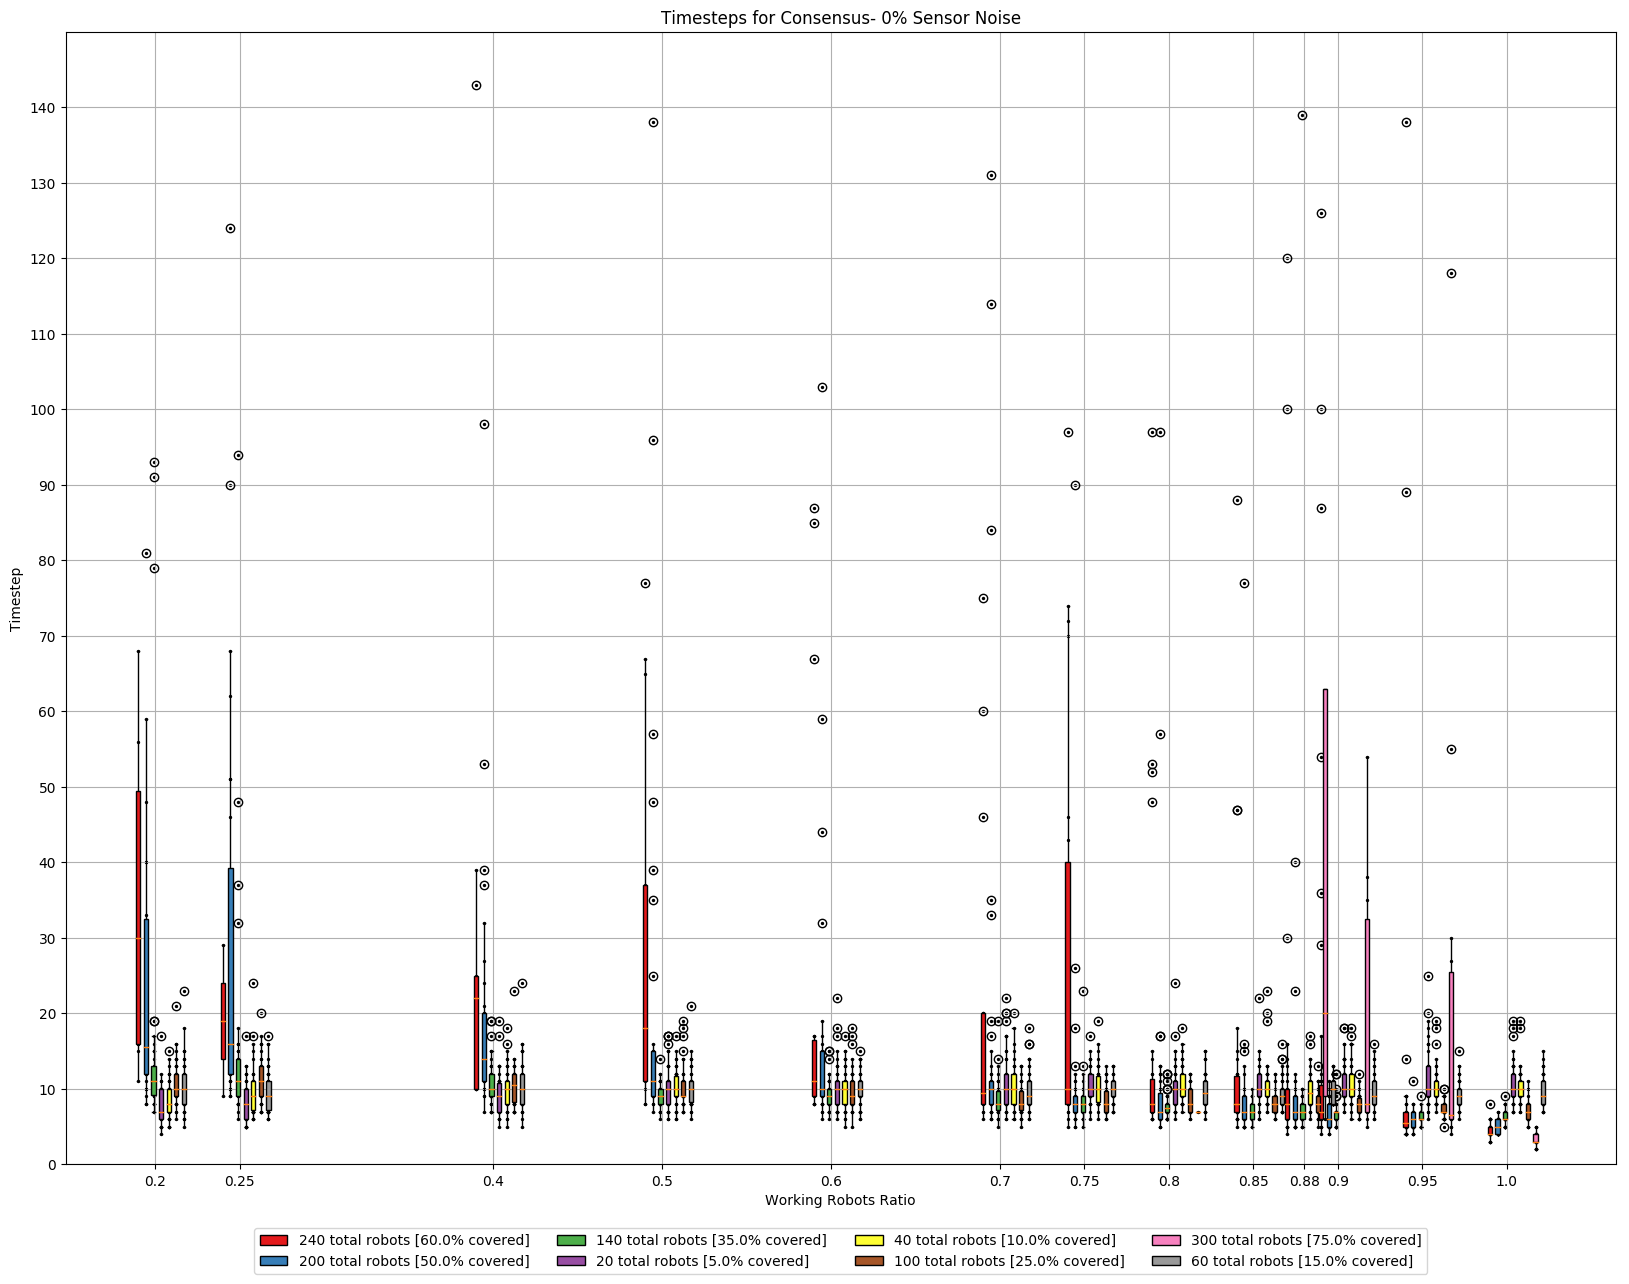

In [8]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,150)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_00.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_00.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_00[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.0' # Loops through everything with the same number of total robots first

        data=converged_data_dict_00[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,150,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 0% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_00.png'),bbox_inches='tight')
plt.show()

---
### Converged cluster-05

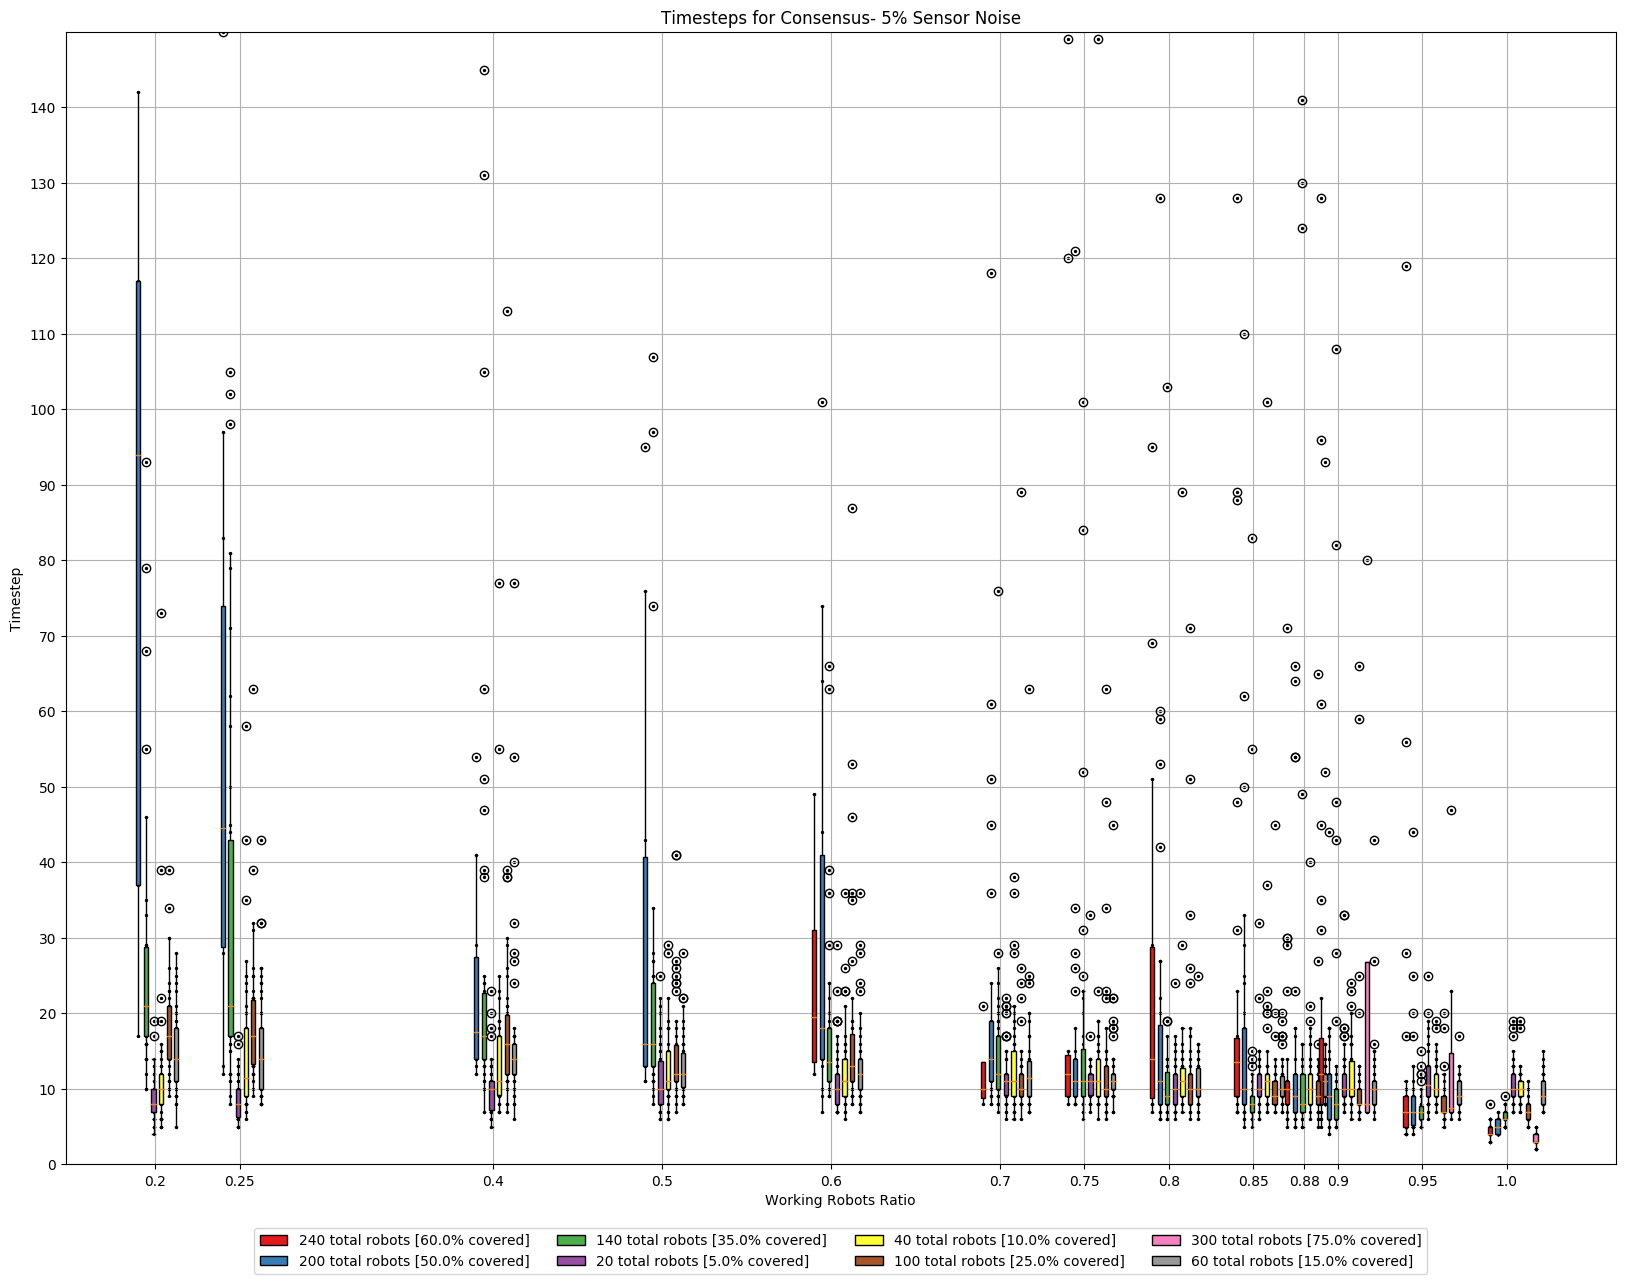

In [9]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,150)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_05.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_05.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_05[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.05' # Loops through everything with the same number of total robots first

        data=converged_data_dict_05[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,150,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 5% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_05.png'),bbox_inches='tight')
plt.show()

---
### Converged cluster-10

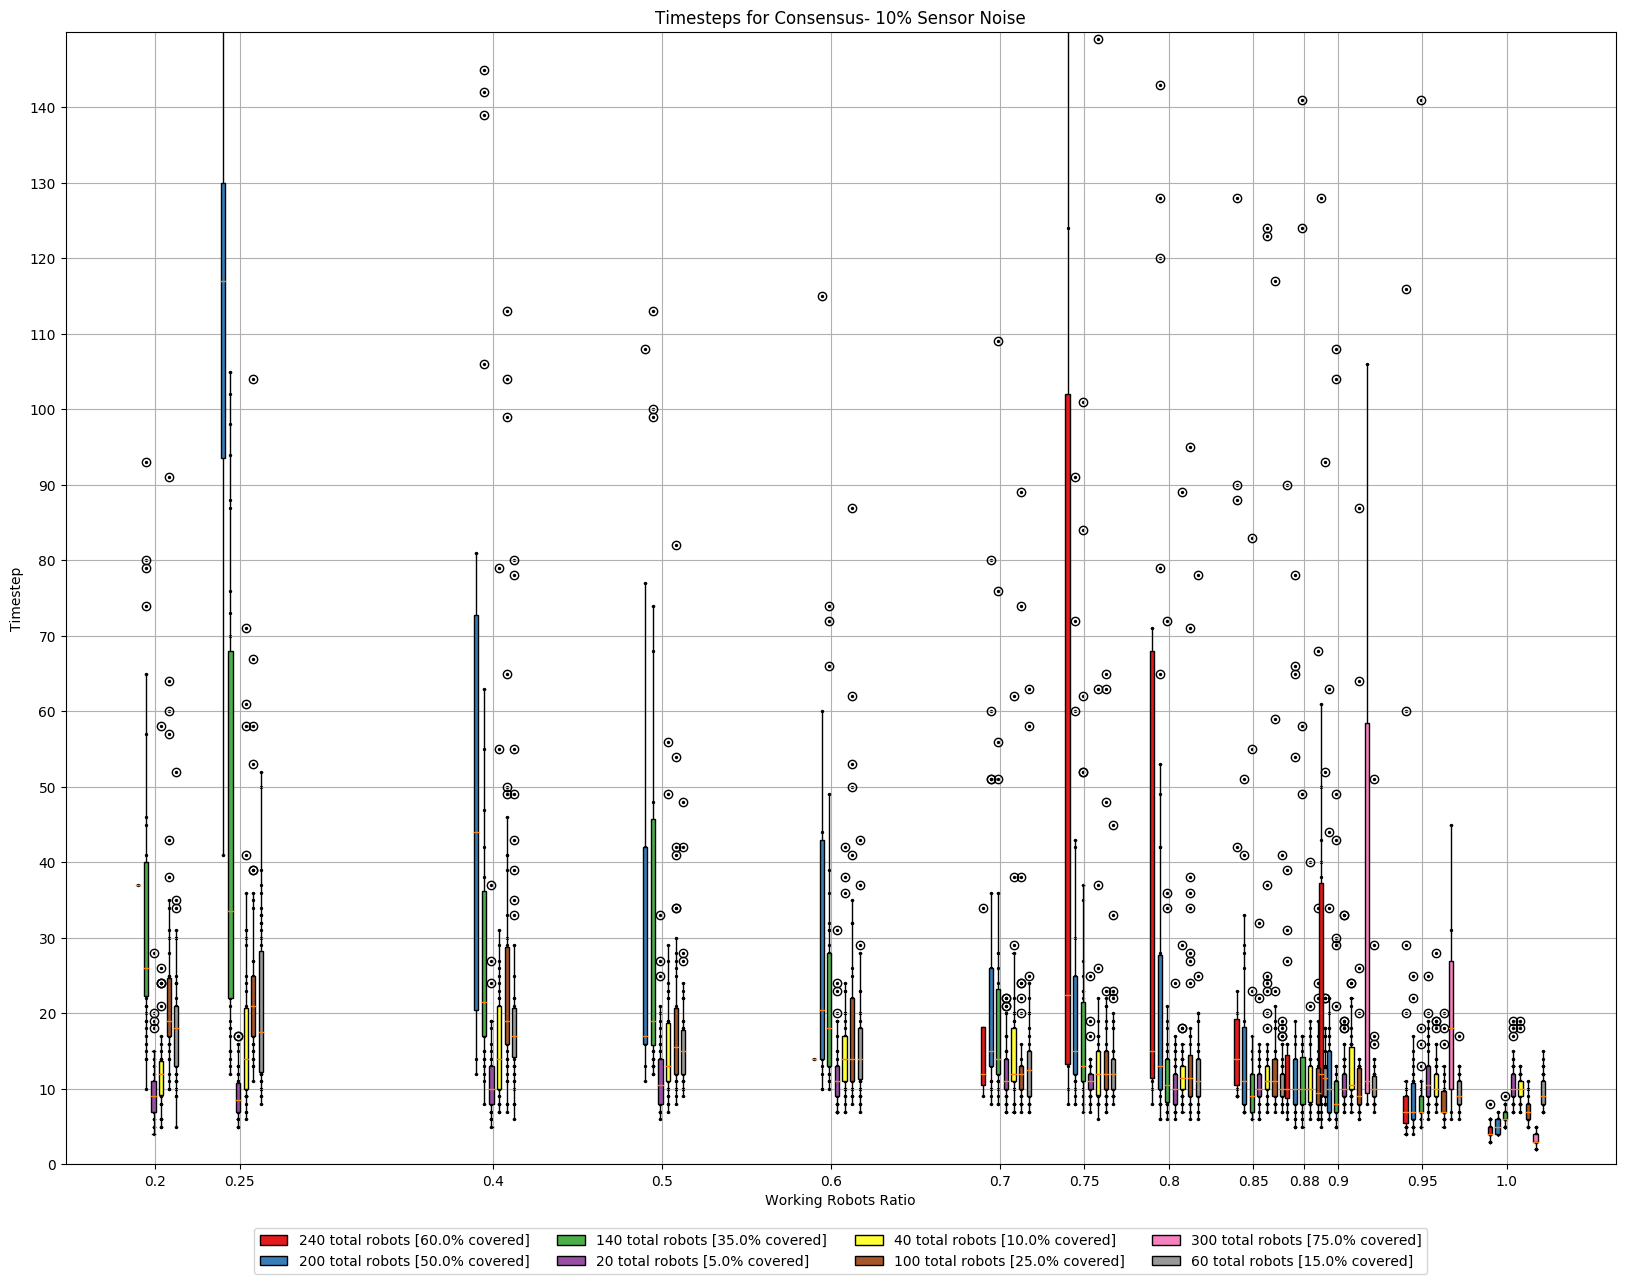

In [10]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,150)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_10.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_10.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_10[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.1' # Loops through everything with the same number of total robots first

        data=converged_data_dict_10[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,150,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 10% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_10.png'),bbox_inches='tight')
plt.show()

---
### Converged cluster-20

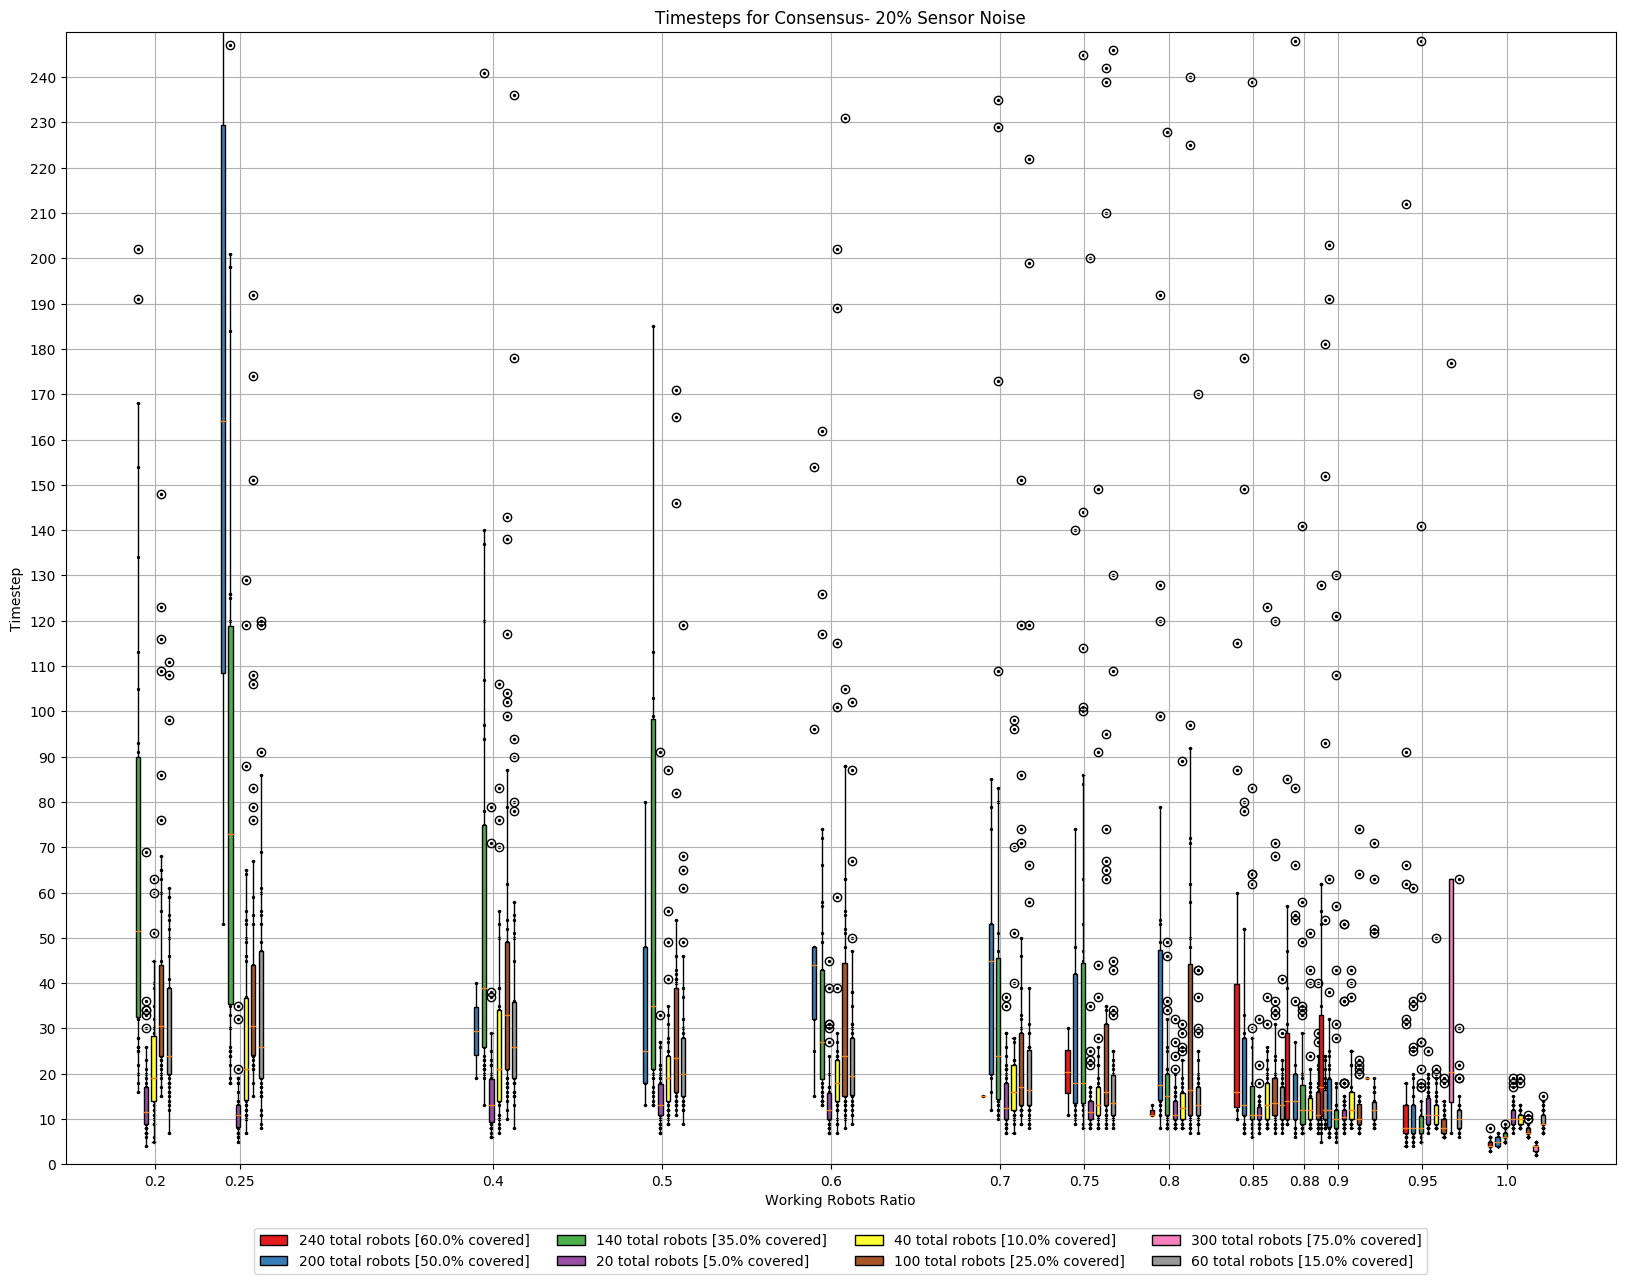

In [11]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,250)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_20.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_20.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_20[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.2' # Loops through everything with the same number of total robots first

        data=converged_data_dict_20[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,250,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 20% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_20.png'),bbox_inches='tight')
plt.show()

---
### Converged cluster-25

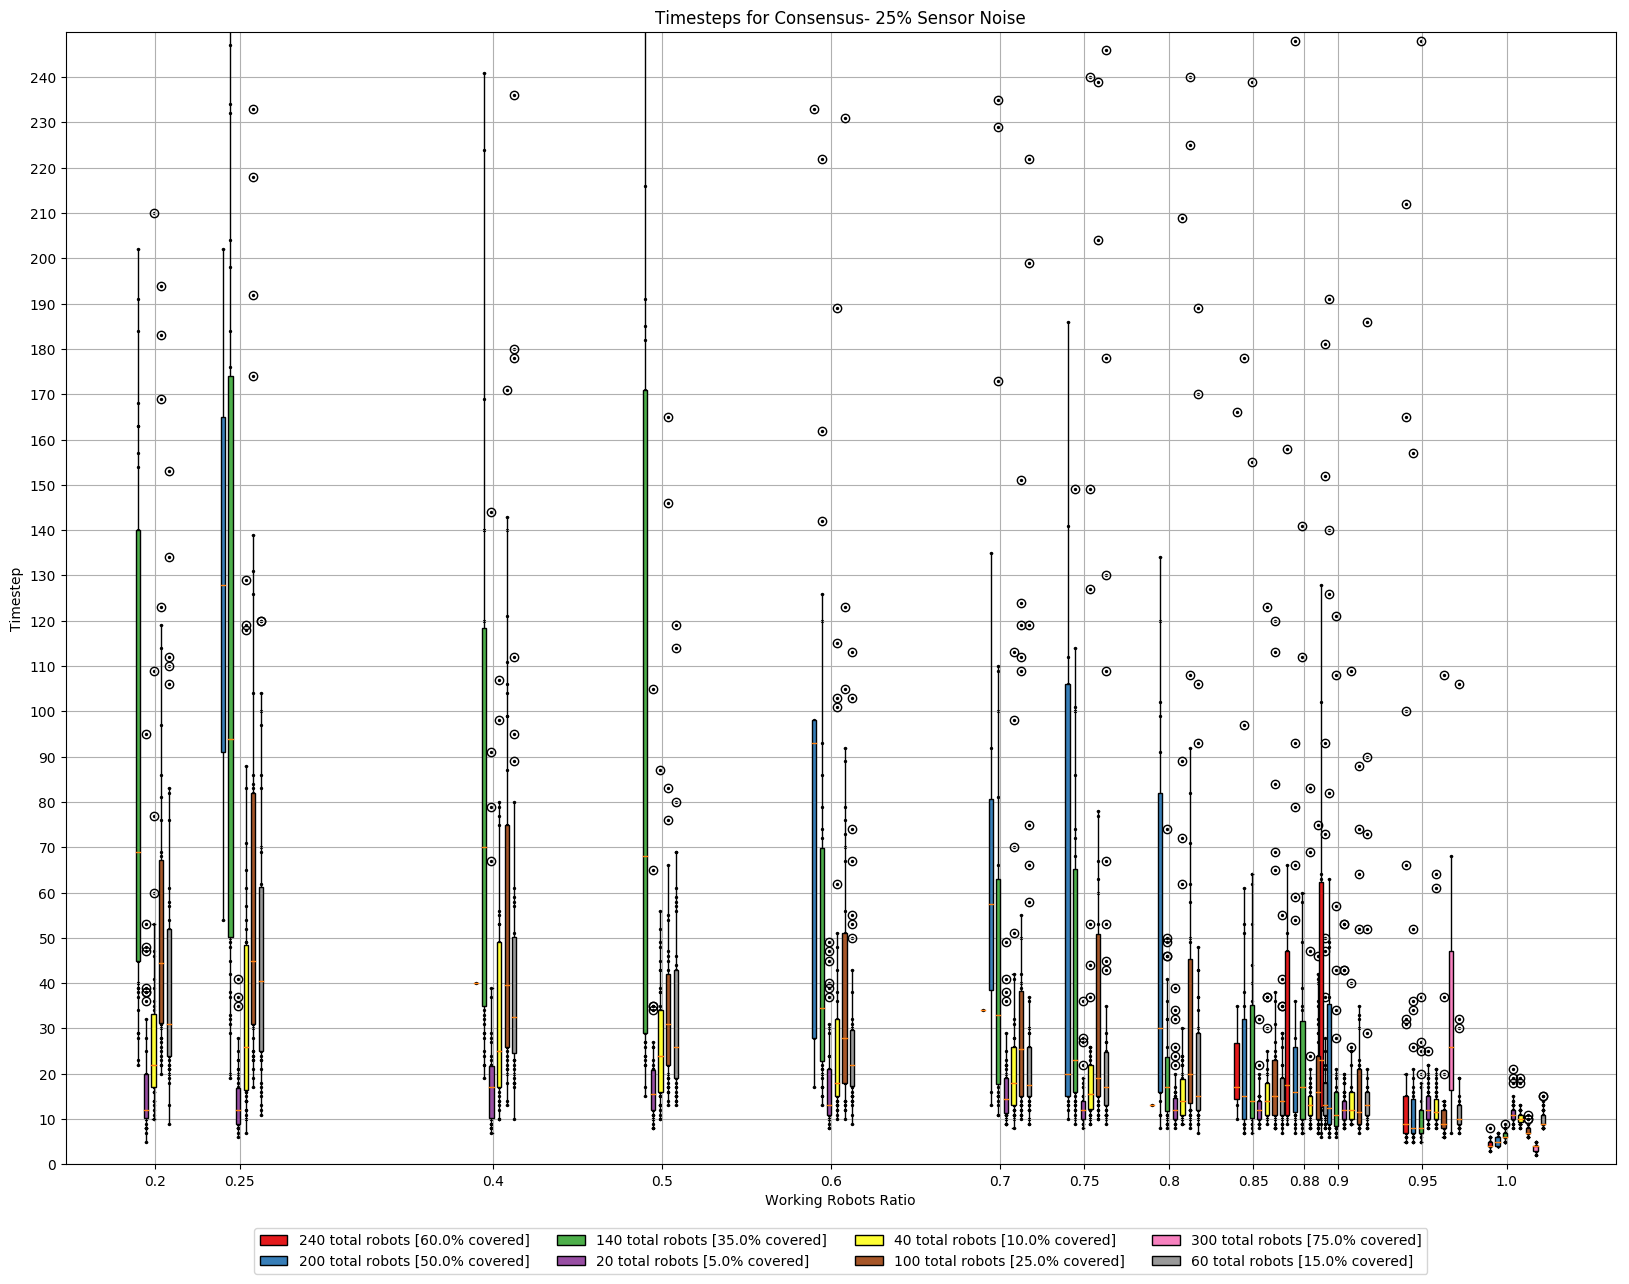

In [12]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,250)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_25.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_25.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_25[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.25' # Loops through everything with the same number of total robots first

        data=converged_data_dict_25[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,250,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 25% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_25.png'),bbox_inches='tight')
plt.show()

---
### Converged cluster-30

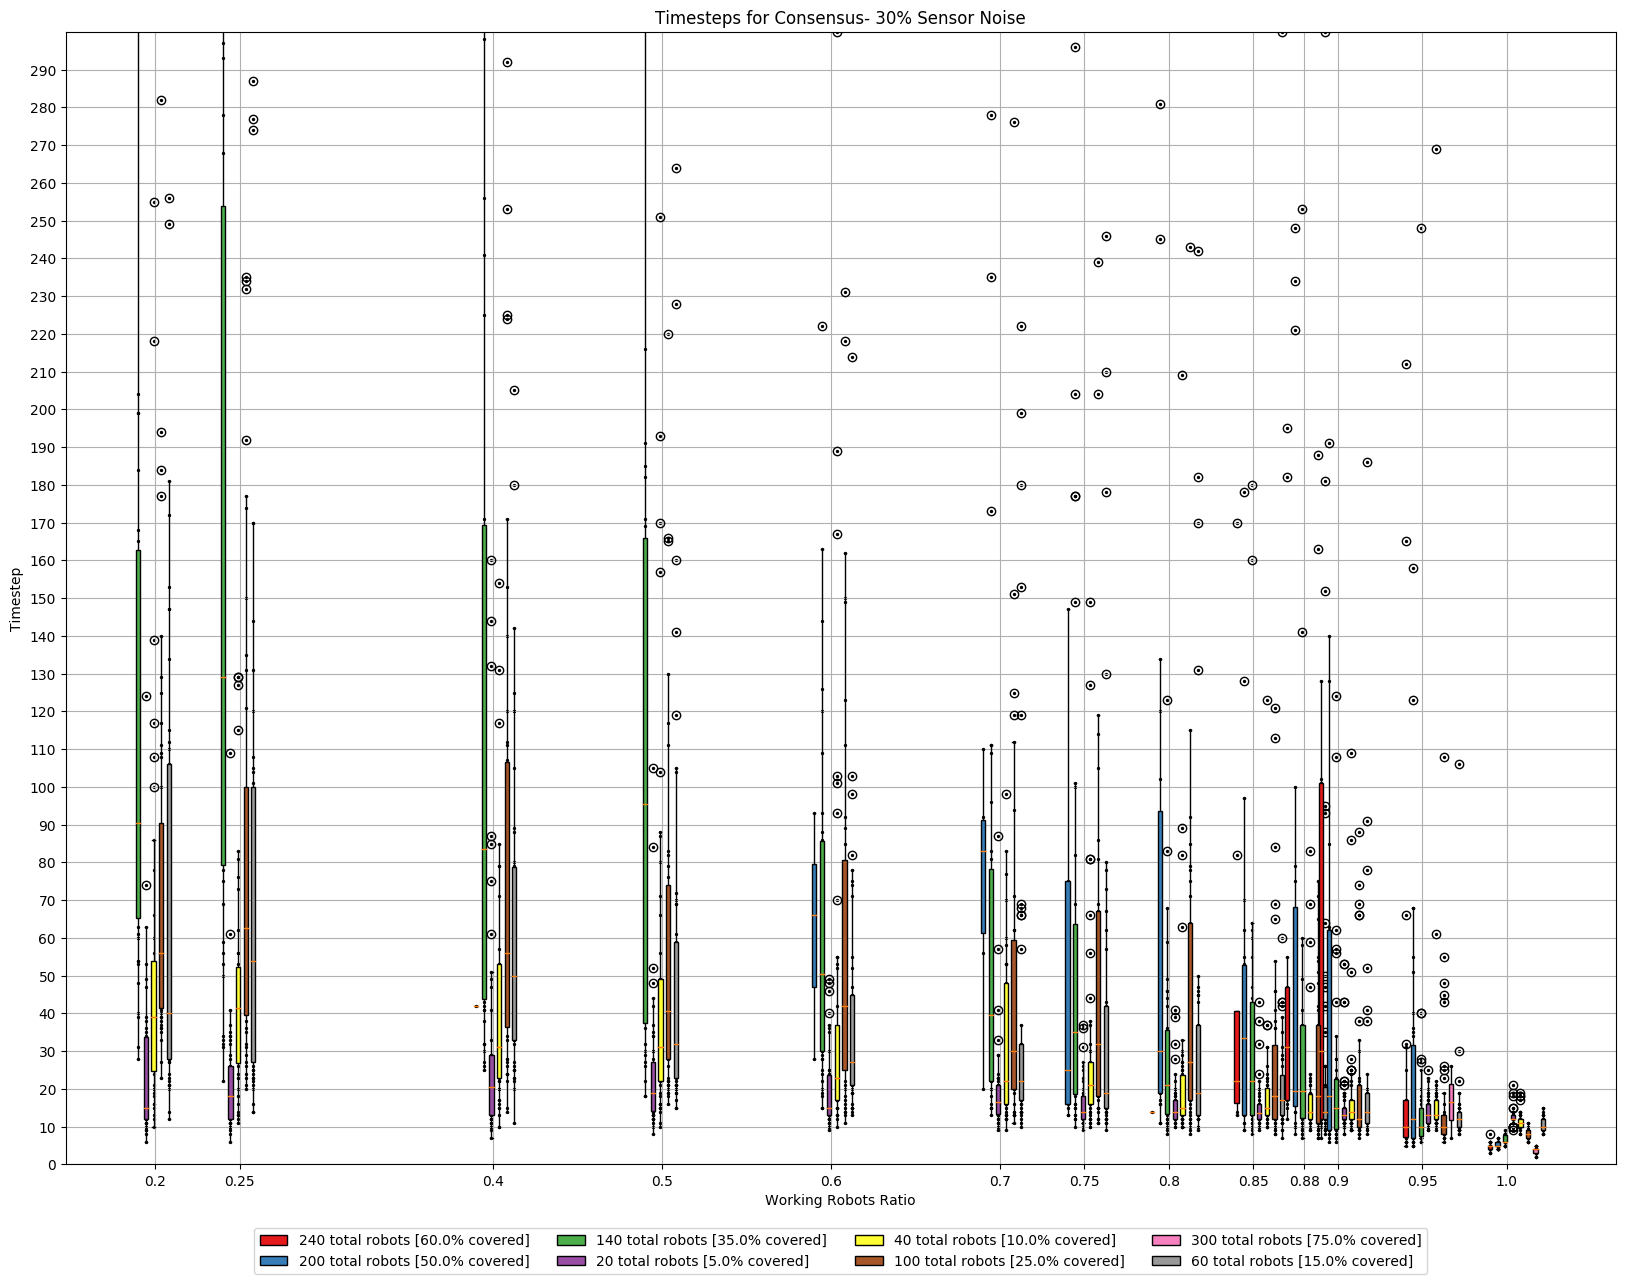

In [13]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,300)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_30.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_30.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_30[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.3' # Loops through everything with the same number of total robots first

        data=converged_data_dict_30[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,300,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 30% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_30.png'),bbox_inches='tight')
plt.show()

---
### Converged cluster-40

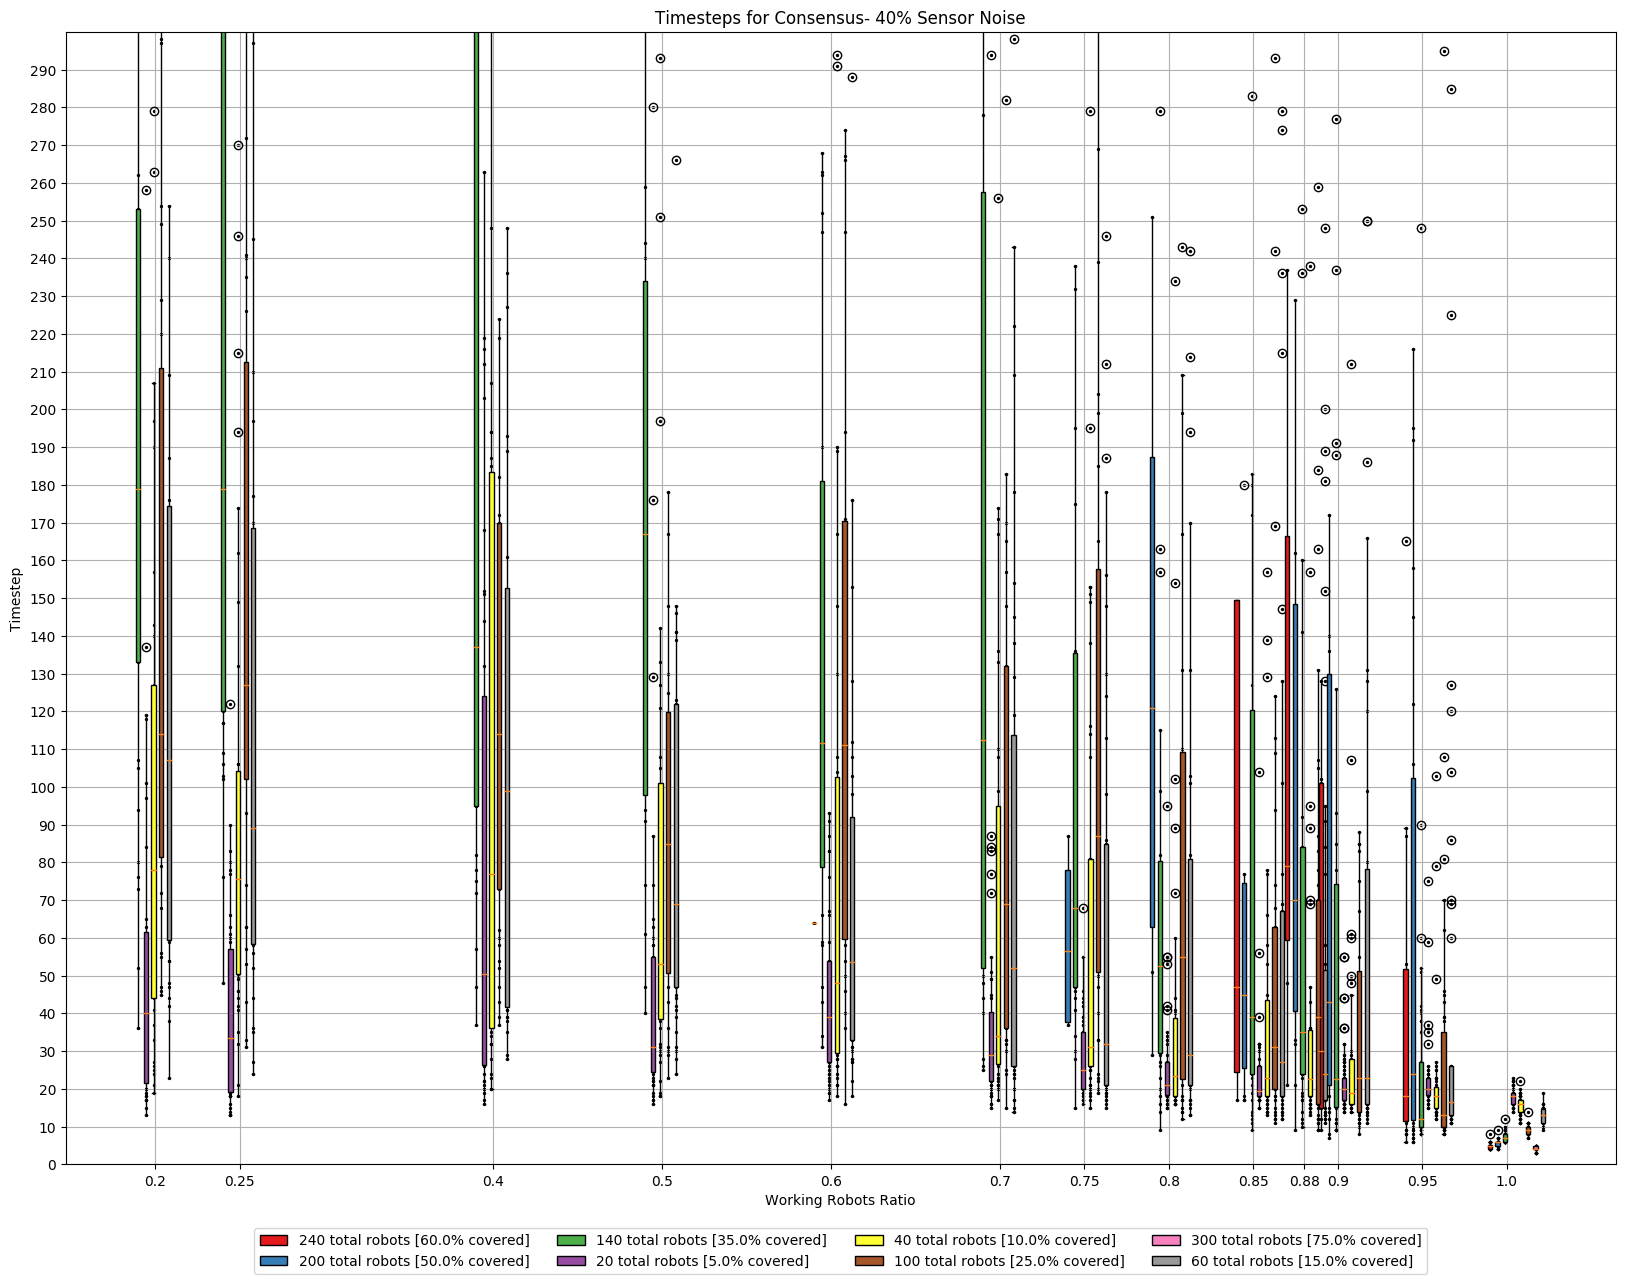

In [14]:
plt.figure(figsize=(20,15),dpi=100)
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(18.5, 10.5)
plt.xlim(0.2,1)
plt.ylim(0,300)

color_map=cm.Set1(np.linspace(0,1,len(setup_dict_40.keys())))
color_count=0
counter={}

boxes=[]
keys=[]
for key,value in setup_dict_40.items():
    keys.append('{} total robots [{}% covered]'.format(key,float(key/4)))
    number=len(setup_dict_40[key])
    plots_per_key=0
    colors=color_map[color_count]
    
    for v in value:
        
        out='C20_R'+str(key)+'_D'+str(v)+'_S0.4' # Loops through everything with the same number of total robots first

        data=converged_data_dict_40[out]
        temp=out.split('_')
        for ind in range(len(temp)):
            temp[ind]=float(remove_chars(temp[ind]))
        arena_length=int(temp[0])
        n_robots=int(temp[1])
        n_defecting=int(temp[2])
        sensor_fault=float(temp[3])
        
        x_val=round(float((n_robots-n_defecting)/n_robots),2) # Ratio of working robots
        x_data=np.array(x_val).reshape(1,1)
        y_data=np.array(data,dtype=np.float).reshape(len(data),1).T

        if x_val in counter: 
            counter[x_val]+=1
        else:
            counter[x_val]=0

        Y_scatter=y_data
               
        boxplot_x=(counter[x_val]*0.0045)+x_val-0.01
        X_scatter=boxplot_x*np.ones_like(Y_scatter)
        
        plt.scatter(X_scatter,Y_scatter,color='black',s=2.0) 
        
        if (plots_per_key+1)==number:

            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
            boxes+=[box['boxes'][0]]
        else:
            box=plt.boxplot(y_data[0],positions=[boxplot_x],widths=0.0025,patch_artist=True,labels=[str(key)])
                    
        for patch in box['boxes']:
            patch.set_facecolor(colors)
        plots_per_key+=1
    color_count+=1

plt.autoscale(enable=True, axis='x',tight=False)

# intervals=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
# xm=make_xmap(intervals)
# plt.xticks(xm(intervals), [str(xi) for xi in intervals])

# plt.xticks(np.arange(.2,1.1,0.05),np.arange(.2,1.1,0.05))
ticks=[0.2,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.85,0.88,0.9,0.95,1.0]
plt.xticks(ticks,ticks)

plt.yticks(np.arange(0,300,10))
plt.legend(boxes,keys,loc='upper center',bbox_to_anchor=(0.5, -0.05),
          ncol=4)
plt.grid(True)


plt.title('Timesteps for Consensus- 40% Sensor Noise')
plt.xlabel('Working Robots Ratio')
plt.ylabel('Timestep')
plt.savefig(os.path.join(save_file+'Converged_40.png'),bbox_inches='tight')
plt.show()